# Assignment 2

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

## Question 2

In [28]:
# Dataset
x = [-4, -2, 1, 3, -1, -5, 4, 2, 0, -3, 5]
y = [16, 4, 1, 9, 1, 25, 16, 4, 0, 9, 25]

### (2 - A) Examine the scatter plot of Y versus X. Is there a relationship between Y and X ?

<AxesSubplot:>

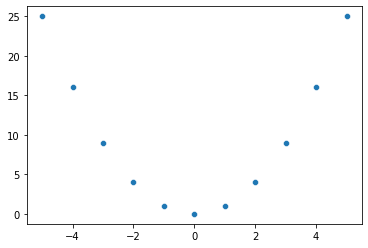

In [29]:
sns.scatterplot(x=x, y=y)

The relation between X and Y is quadratic relation. The quadratic relation between two variables is given as $y = ax^2 + bx + c$ while in this case our data is of the form $y = x^2$ which makes it the simplest form of quadratic relation where $a = 1$, $b = 0$ and $c = 0$

### (2 - B) What is the estimated linear regression equation relating Y to X ? What type of regression model it is?

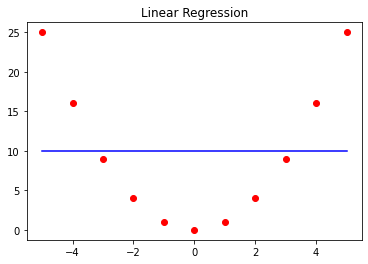

Estimated Coefficients is 9.539787621017582e-17 and Intercept is 10.0


In [30]:
# (a-2) What is the estimated linear regression equation relating Y to X ? What type of regression model it is?

# Estimating Vanila Linear Regression Model
import numpy as np
from sklearn.linear_model import LinearRegression

# Function to Preprocess List Data into Array
def preprocess_list(x, y):
    if isinstance(x, list) or isinstance(y, list):
        x = np.asarray(x)
        y = np.asarray(y)
    if len(x.shape) == 1:
        x = x.reshape(-1, 1)
    if len(y.shape) == 1:
        y = y.reshape(-1, 1)
    return x, y

# Function to Estimate Simple Linear Regression Model
def estimate_linear_regression(x, y):
    x, y = preprocess_list(x, y)
    linear_reg = LinearRegression(fit_intercept=True)
    linear_reg.fit(x, y)
    y_hat = linear_reg.predict(x)
    return linear_reg.coef_[0][0], linear_reg.intercept_[0], y_hat

# Visualizing the Regression results
def visualize_regression(x, y, y_hat, title="Regression"):
    order = np.argsort(x)
    x = np.array(x)[order]
    y = np.array(y)[order]
    y_hat = np.array(y_hat)[order]

    plt.scatter(x, y, color='red')
    plt.plot(x, y_hat, color='blue')
    plt.title(title)
    plt.show()

coefficients, intercept, y_hat = estimate_linear_regression(x, y)
visualize_regression(x, y, y_hat, title="Linear Regression")
print(f"Estimated Coefficients is {coefficients} and Intercept is {intercept}")

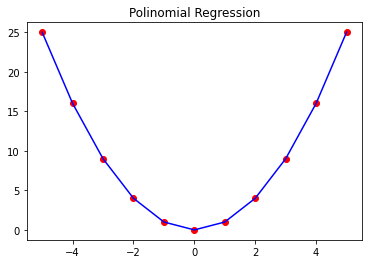

Estimated Coefficients is 9.539787621017581e-17 and 1.0 where as  Intercept is 0.0


In [31]:
# Estimate Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

def estimate_polinomial_regression(x, y, order=2):
    x, y = preprocess_list(x, y)
    poly = PolynomialFeatures(degree=order, include_bias=False)
    poly_features = poly.fit_transform(x)
    polinomial_reg = LinearRegression(fit_intercept=True)
    polinomial_reg.fit(poly_features, y)
    y_hat = polinomial_reg.predict(poly_features)
    return polinomial_reg.coef_[0], polinomial_reg.intercept_[0], y_hat

coefficients, intercept, y_hat = estimate_polinomial_regression(x, y, order=2)
visualize_regression(x, y, y_hat, title="Polinomial Regression")

print(f"Estimated Coefficients is {coefficients[0]} and {coefficients[1]} where as  Intercept is {intercept}")

As we can see that the Simple Linear Regression is not able to properly fit the data while the Polinomial Linear Regression is able to fit the data. 

From this run we get the Polinomial Regression model as $$\hat{y} = 1.0 \times x^2 + 9.539787621017581e-17 \times x + 0.0$$ 
Here the coefficient for $x$ is very small (i.e. 9.539787621017581e-17) and intercet is $0.0$.
We can ignore them and rewrite the model as $$\hat{y} \sim 1.0 \times x^2$$
This proves our initial answer for the first question. 

### (2 - C) Test the hypothesis that the slope equals 0. Can we say there is no relationship between two data?

**This part of analysis is for Simple Linear Regression Model $\ y = mX + c$**

1. Define the hypothesis
    - Null Hypothesis: $m = 0$ $\implies$ There is no significant linear relationship between the independent variable $X$ and the dependent variable $Y$.
    - Alternative Hypothesis: $m \neq 0$ $\implies$ There is a significant linear relationship between the independent variable $X$ and the dependent variable $Y$.

2. Decide Significance Level for the test
    - For our case we are choosing Significance Level $\alpha = 0.05$

3. Select Statistical Test
    - We are using **linear regression t-test** to determine whether the slope of the regression line differs significantly from zero.
    - We found the detail of the test on [Wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-test) under Slope of a Regression Line section.


4. Compute Test Statistics
    - To Perform **linear regression t-test** we need to compute following set of parameters using our Sample Dataset.
        - Standard error of the slope
        - The Slope of the Regression Line
        - The degrees of freedom --> For Simple Linear Regression Degree of Freedom is $n - 2$ where $n$ is number of data points. 
        - The test statistic
        - The p-value associated with the test statistic.
    - To calculate these parameters we will use [SciPy Library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)

In [32]:
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(x, y)

print(f"The Standard Error of the Slope is {std_err}")
print(f"The Slope of th Regression Line is {slope}")
print(f"The p-value associated with the test statistic is {p}")

The Standard Error of the Slope is 0.9309493362512627
The Slope of th Regression Line is 0.0
The p-value associated with the test statistic is 1.0


In [33]:
alpha = 0.05
if p < alpha:
    print(f"As p-value {p} is less than significance level alpha {alpha}, We can reject the null hypothesis and accept the alternative hypothesis.")
else:
    print(f"As p-value {p} is greter than or equal to significance level alpha {alpha}, We fail to reject the null hypothesis.")

As p-value 1.0 is greter than or equal to significance level alpha 0.05, We fail to reject the null hypothesis.


As during our test we found p-value to be higher that significance level, we fail to reject null hypothesis. 

This leds us to belive that there is **not enough statistical evidence** to conclude that there is some significant linear relationship between the independent variable $X$ and the dependent variable $Y$.

## Question 3

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from utils import styled_print, download_data, read_and_clean_data, plot_box_plot_hist_plot, plot_count_plot, discrete_to_target_plot

In [35]:
cleveland_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

In [36]:
headers = {
    0: "age",
    1: "sex",
    2: "cp",
    3: "trestbps",
    4: "chol",
    5: "fbs",
    6: "restecg",
    7: "thalach",
    8: "exang",
    9: "oldpeak",
    10: "slope",
    11: "ca",
    12: "thal",
    13: "target"
}

In [37]:
styled_print(f"Heart Disease Data Analysis", header=True)
styled_print(f"Extracting Data From {cleveland_url}")
cleveland_file = download_data(cleveland_url, path_to_download="./data")
cleveland_df = read_and_clean_data(cleveland_file, header=headers.values())

› Heart Disease Data Analysis
    Extracting Data From http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data


In [38]:
styled_print(f"Cleveland Dataframe Info", header=True)
cleveland_df.info()

› Cleveland Dataframe Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


# Dataset Understanding and Observations

Here are some observations from the `heart-disease.names` file regarding the features.

1. `age` is a `continuous` feature which indicates the age of the person in years. 
2. `sex` is a `binary categorical` feature indicating sex information.
    - 1 : male
    - 0 : female
3. `cp` is a `categorical` feature which indicates the type of chest pain.
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
4. `trestbps` is a `continuous` feature indicating resting blood pressure (in mm Hg on admission to the hospital).
5. `chol` is a `continuous` feature indicating serum cholestoral in mg/dl.
6. `fbs` is a `binary categorical` feature indicating fasting blood sugar > 120 mg/dl.
    - 1 : true
    - 0 : false
7. `restecg` is a `categorical` feature indicating resting electrocardiographic results.
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. `thalach` is a `continuous` feature indicating maximum heart rate achieved.
9. `exang` is a `binary categorical` feature indicating exercise induced angina.
    - 1 : yes
    - 0 : no
10. `oldpeak` is a `continuos` feature indicating ST depression induced by exercise relative to rest.
11. `slope` is a `categorical`feature indicating the slope of the peak exercise ST segment.
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
12. `ca` is a `categorical` feature indicating number of major vessels (0-3) colored by flourosopy.
13. `thal` is a `categorical` feature.
    - 3 : normal
    - 6 : fixed defect
    - 7 : reversable defect
14. `target` is a `categorical` feature (target) indicating the diagnosis of heart disease (angiographic disease status)

**Two main observations:** 
1. As all of over categorical features are already numerically encoded we will treat them as discrete feature and not traditional categorical features. 
2. As provided in `heart-disease.names` file:

    ```The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).```

    So Initially We can convert the `target` into two categories 
    - 0: Absence of Heart disease
    - 1: Presence of Heart disease (Combine current categories 1, 2, 3, and 4)

In [39]:
categorical_columns = ["cp", "restecg", "slope", "thal", "ca"]
binary_columns = ["sex", "fbs", "exang"]

continuous_columns = ["age", "trestbps", "chol", "thalach", "oldpeak"]
discrete_columns = categorical_columns + binary_columns
target_column = ["target"]

In [40]:
# Creating Copy of Dataframe for Data Processing
data_df = cleveland_df.copy()

## Data Preprocessing and Exploratory Data Analysis

### Preprocessing Target

In [41]:
# Check unique values for target and its percentage
data_df["target"].value_counts(dropna=False)

0    164
1     55
2     36
3     35
4     13
Name: target, dtype: int64

In [42]:
# Mapping target 2, 3, and 4 to 1. 
target_mapping = {2: 1, 3: 1, 4: 1}
data_df["target"] = data_df["target"].apply(lambda x: 1 if x == 2 or x == 3 or x == 4 else x)

In [43]:
# Check unique values for target and its percentage
data_df["target"].value_counts(dropna=False)

0    164
1    139
Name: target, dtype: int64

### Splitting The Data

To split the data we are using `train_test_split()` method from `sklearn's` `model_selection` module. The splitting is based on the following parameters:
1. `test_size` is set to `0.2`. It will makes sure that we have 20% of our data for testing and rest 80% of data we can use for training and/or cross-validation.
2. `random_state` is set to `10`. We can set it to any fix number as it will help us in reproducibility of our experiment.
3. `stratify` is set to `target` feature. This will ensure the stratified sampling process. In simple words it will make sure that the distribution of Heart Disease and Non-Heart Disease patient remains as it is even after the split. Refer [this](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators-with-stratification-based-on-class-labels) for further details. 
4. `shuffle` is set to `True`.

In [44]:
train_df, test_df = train_test_split(data_df, test_size=.2, random_state=10, stratify=data_df["target"], shuffle=True)

Let's check how stratify sampling make sure that the distribution of data is balance after the split too. 

In [45]:
# Check unique values for target and its percentage
data_df["target"].value_counts(normalize=True)*100

0    54.125413
1    45.874587
Name: target, dtype: float64

In [46]:
# Check unique values for target and its percentage
train_df["target"].value_counts(normalize=True)*100

0    54.132231
1    45.867769
Name: target, dtype: float64

In [47]:
# Check unique values for target and its percentage
test_df["target"].value_counts(normalize=True)*100

0    54.098361
1    45.901639
Name: target, dtype: float64

As we can see that in both training and testing dataset, `54%` of data comes from the `label 0` i.e. Absence of Heart Disease while `45%` of data comes from the `label 1` i.e. Presence of Heart Disease. **These percentages matches the percentage distribution in original dataset.**

**Why are we splitting data first before any exploratory data analysis or even treating missing values??**

Our reasoning to split the data at the very beginning of workflow is to make sure that we can ensure that there is no data leak issues.
For example, we usually use median value to replace the missing values in a continuous feature. We want to make sure that the median value which we calculate comes only from the training set and we apply it to test set. This way we can gurantee that even in data preprocessing we are not introducing any direct or indirect data leak issues. 

This fact is usually ignored in many books and material but in practice it is heavily been used. 


### Descriptive Statistics

In [48]:
train_df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
age,242.0,54.669421,9.102814,29.0,48.0,56.0,61.00,77.0
trestbps,242.0,131.727273,17.601160,94.0,120.0,130.0,140.00,200.0
chol,242.0,247.909091,53.201878,126.0,212.0,240.0,276.75,564.0
thalach,242.0,148.896694,23.489242,71.0,132.0,153.0,165.75,202.0
oldpeak,242.0,1.008678,1.109880,0.0,0.0,0.7,1.60,5.6


**Observations**
- The `average age is 54 years` in our dataset while the `median age is 56`. These two numbers are relatively close and because of that we hope to see almost `normal distribution of age feature`. 
- The `average trestbps` i.e. resting blood pressure at the time of admission to hospital is `~ 131 mm Hg` while `median is ~ 130 mm Hg`. These two numbers are relatively close and because of that we hope to see almost `normal distribution of trestbps feature`. 
- The `min chol is 126` while the `max is 564`. The range of values between min and median is 114 (240 - 126) while the range of values between max and median is 324 (564 - 240). The standard deviation for `chol` is also 53 which is relatively higher than other features. This makes us believe that there is some skewness in `chol` feature and it would be really interesting to check the distribution of it. 

In [49]:
for col in discrete_columns:
    styled_print("~"*5 + f"Unique Value Counts for {col}" + "~"*5, header=True)
    print(train_df[col].value_counts(normalize=True, dropna=False)*100)

› ~~~~~Unique Value Counts for cp~~~~~
4.0    46.694215
3.0    28.099174
2.0    17.768595
1.0     7.438017
Name: cp, dtype: float64
› ~~~~~Unique Value Counts for restecg~~~~~
0.0    51.652893
2.0    47.520661
1.0     0.826446
Name: restecg, dtype: float64
› ~~~~~Unique Value Counts for slope~~~~~
2.0    50.000000
1.0    44.628099
3.0     5.371901
Name: slope, dtype: float64
› ~~~~~Unique Value Counts for thal~~~~~
3.0    54.132231
7.0    39.256198
6.0     5.785124
NaN     0.826446
Name: thal, dtype: float64
› ~~~~~Unique Value Counts for ca~~~~~
0.0    56.611570
1.0    22.727273
2.0    13.223140
3.0     6.198347
NaN     1.239669
Name: ca, dtype: float64
› ~~~~~Unique Value Counts for sex~~~~~
1.0    67.768595
0.0    32.231405
Name: sex, dtype: float64
› ~~~~~Unique Value Counts for fbs~~~~~
0.0    83.884298
1.0    16.115702
Name: fbs, dtype: float64
› ~~~~~Unique Value Counts for exang~~~~~
0.0    68.595041
1.0    31.404959
Name: exang, dtype: float64


**Observations**
- ~ 67% of our training data represents `male` while ~ 33% of our training data represents `female`. It would be really interesting to see whether there is any relation between `sex` of an individual and presence of heart disease. 
- ~ 16% of our patients in our data has fasting blood sugar > 120 mg/dl. It would be interesting to see how this relates to the presence of heart disease.
- ~ 1.2% of data in `ca` feature is missing. On the other hand ~ 0.82% of data is missing from `thal` feature. We might need to decide a strategy to replace missing values. 

### Univariate Analysis - Continuous Features

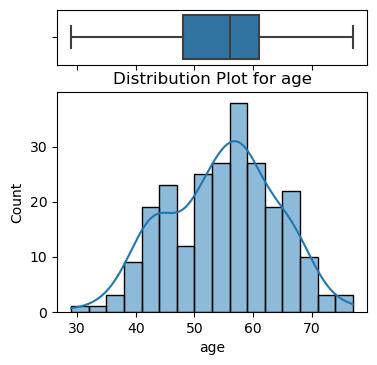

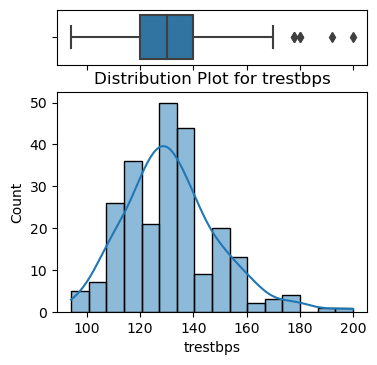

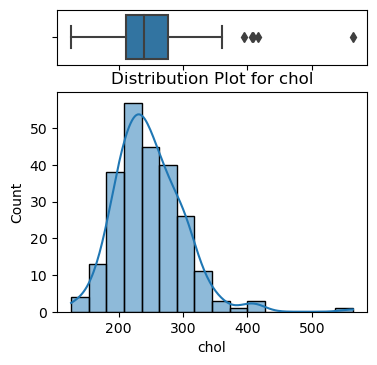

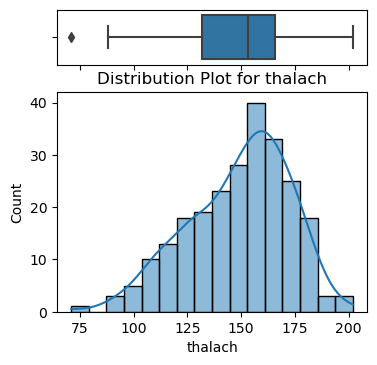

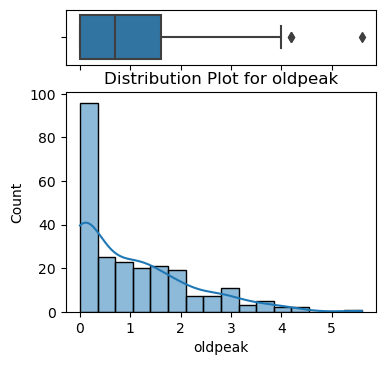

In [50]:
for col in continuous_columns:
    plot_box_plot_hist_plot(
        df=train_df,
        column=col,
        title=f"Distribution Plot for {col}",
        figsize=(4, 4),
        save_flag=False,
        dpi=100

    )

### Univariate Analysis - Discrete Features

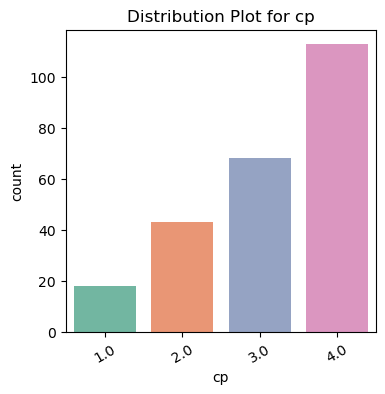

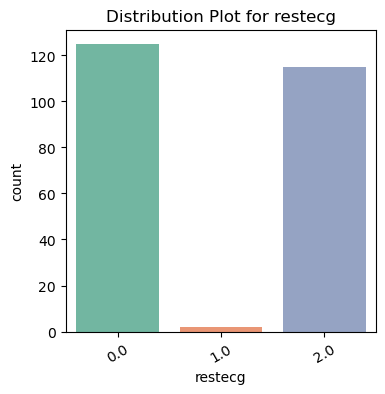

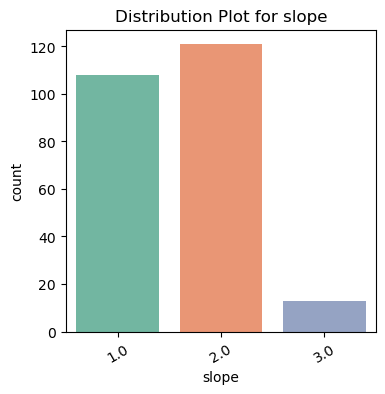

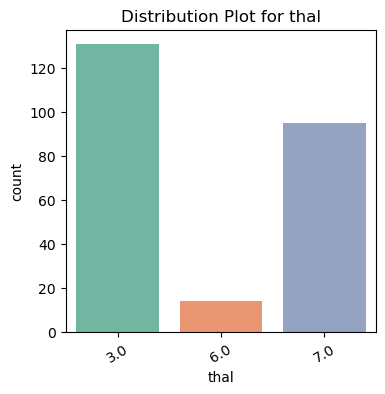

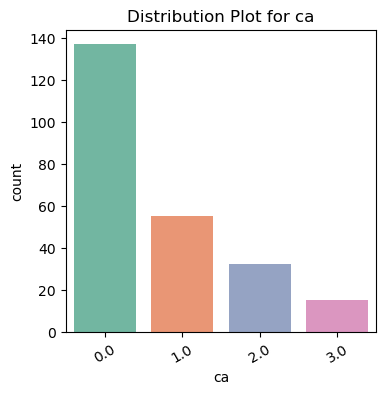

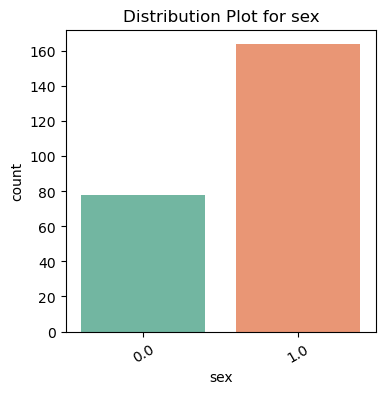

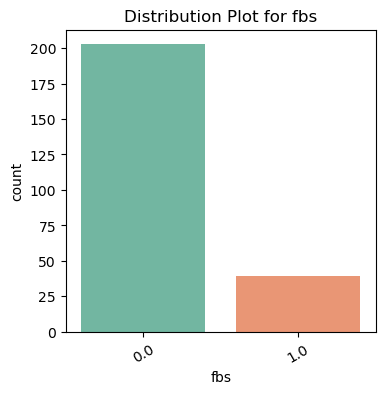

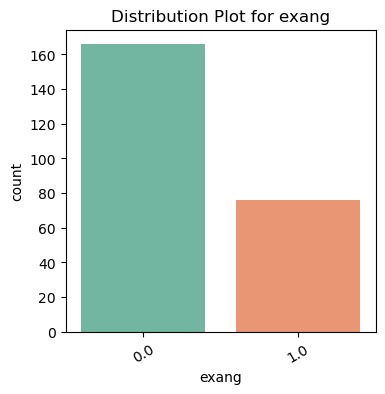

In [51]:
for col in discrete_columns:
    plot_count_plot(
        df=train_df,
        column=col,
        title=f"Distribution Plot for {col}",
        figsize=(4, 4),
        save_flag=False,
        dpi=100
    )

### Bivariate Analysis

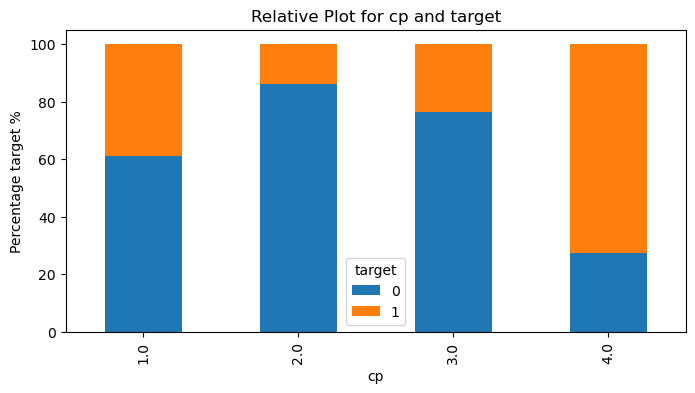

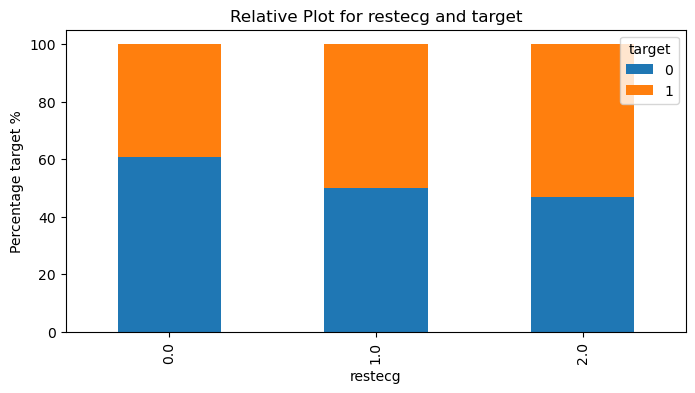

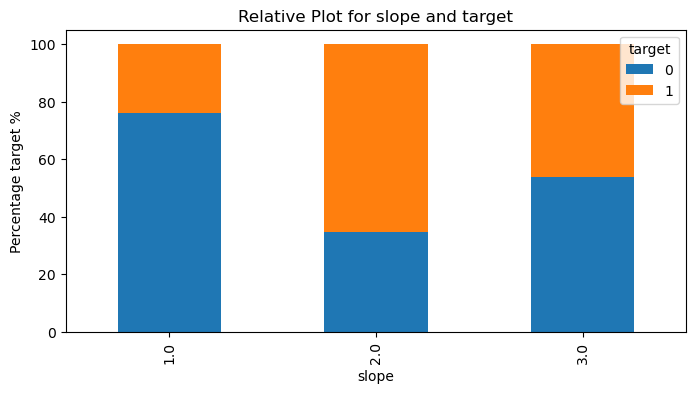

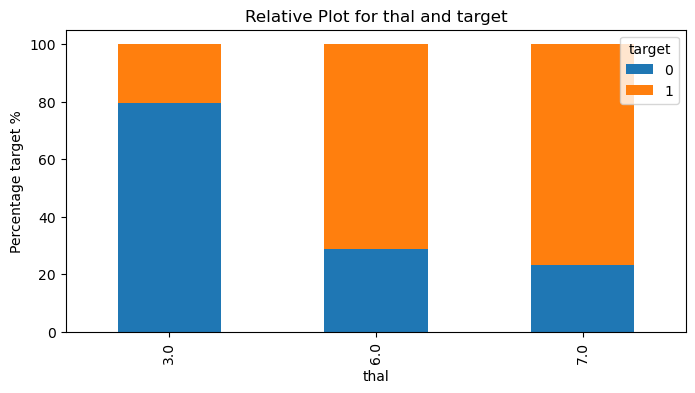

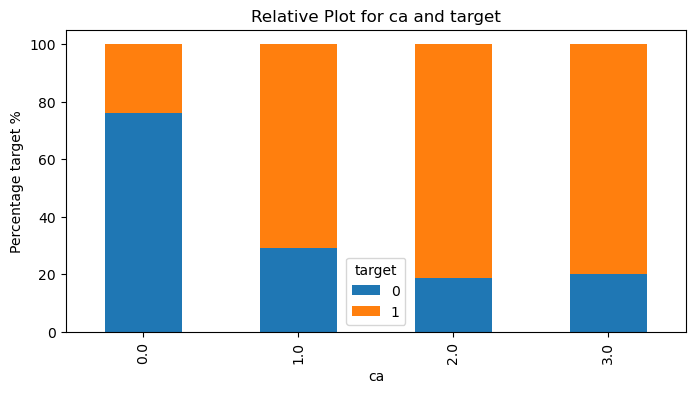

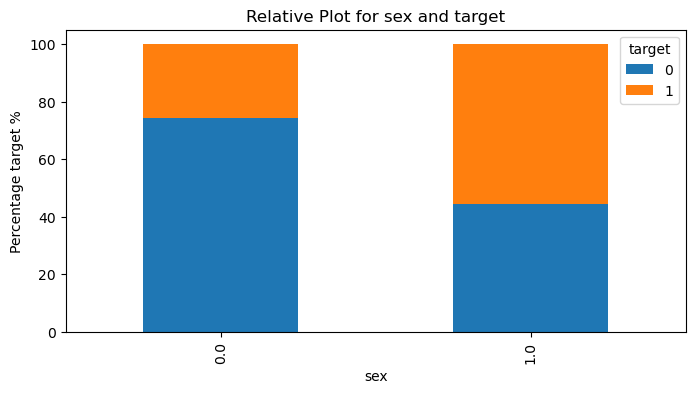

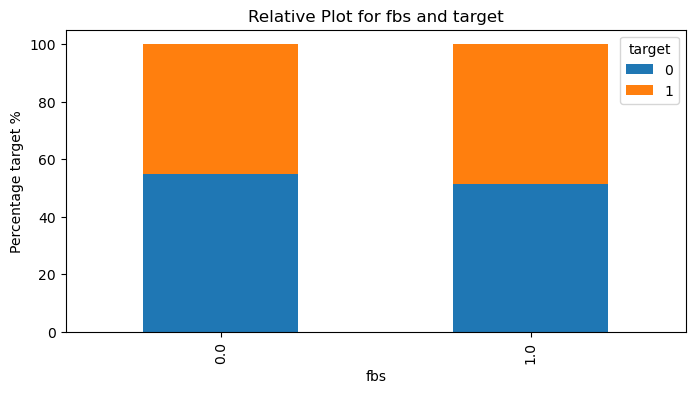

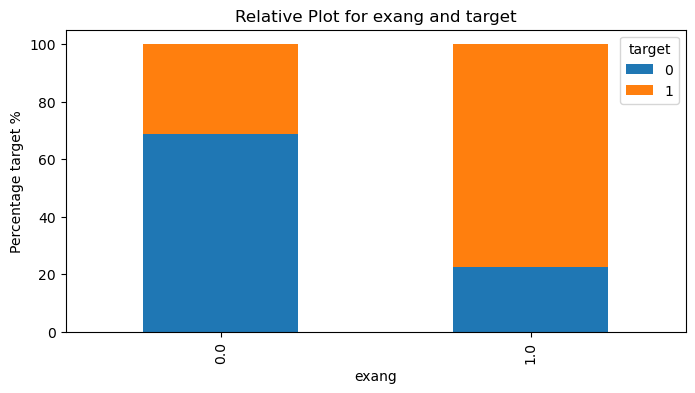

In [52]:
for discrete_column in discrete_columns:
    discrete_to_target_plot(
        train_df, 
        discrete_column, 
        target_column[0],
        title=f"Relative Plot for {discrete_column} and {target_column[0]}",
        figsize=(4, 4),
        save_flag=False,
        dpi=100 
    )